## 2.1 Introduction<a id='2.2_Introduction'></a>


This step focuses on collecting your data, organizing it, and making sure it's well defined. 

### 2.1.1 Recap Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>


In this project, we are trying to create a fraud detection system to predict fraud from the data provided on kaggle 
https://www.kaggle.com/shivamb/vehicle-claim-fraud-detection

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2.4 Objectives<a id='2.4_Objectives'></a>

The objectives of this project is to determine the variables leading to fraudulent transactions in auto claims

## 2.5 Load The Vehicle Claim Data 

In [2]:
vf = pd.read_csv("fraud_oracle.csv")

In [3]:
#Calling  the info method on vf to see info about the data
vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

<b> Luckily the data looks pretty clean without any missing values<b>

In [4]:
# Verifying the number of missing values in each feature
vf.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

##### We do not have any missing values

In [5]:
# Calling  the head method on vf to print the first several rows of the data
vf.head().T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [6]:
vf.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

 Amongst the column list above most of the column seems categorical, apart from deductible.
 Since we are trying to model the fraudulent transaction the " FraudFound_P" is our target variable which is binary 

### Checking the numerical features 


In [7]:
vf.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


Amongst the numeric features week of month, week of month claimed, fraud found, driver rating seems categorical and since policy number, rep number are distinct values,they need to be converted to string

###  Checking for categorical and numerical columns based on unique values. 

In [8]:
vf.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

**It seems all the columns except agein years ( which is discrete in our case), should be categorical as none of the columns apart from policy number have many values. Even policy number cannot be numerical and is nominal categorical data. We cannot get any insight from the policy number as is so we are most likely to drop this later.** 
https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

###  Checking histograms of numerical features so far according to the data

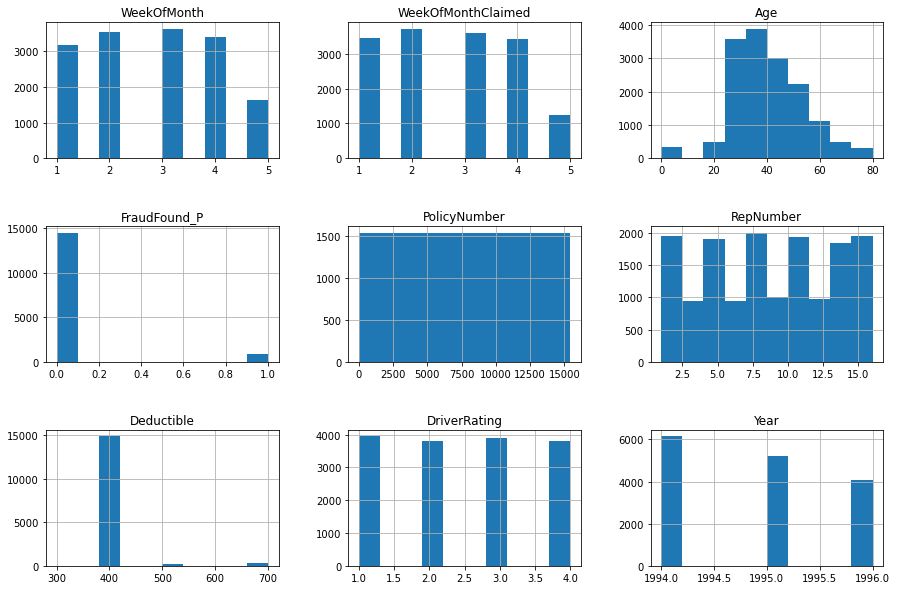

In [9]:
vf.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

####  1. Policy numbers looks randomly distributed, may be it is just a serial number
####  2. Most of the deductibles are in 3 categories. Most commonly involved in claims is 400
####  3. Driver Rating are somewhat equally distributed
####  4. Fraudulent claims have very small proportion 
####  5. Only 3 years of cars showing in the data and year 1994 ( older cars) have more involvement in accidents

##  Checking the distribution of Categorical Columns

In [22]:
### https://www.educative.io/edpresso/how-to-count-unique-items-in-pandas
### Proportional distribution of month values
item_counts = vf['Month'].value_counts(normalize=True)
print(item_counts)

Jan    0.091505
May    0.088651
Mar    0.088197
Jun    0.085668
Oct    0.084630
Dec    0.083333
Apr    0.083009
Feb    0.082101
Jul    0.081518
Sep    0.080415
Nov    0.077886
Aug    0.073087
Name: Month, dtype: float64


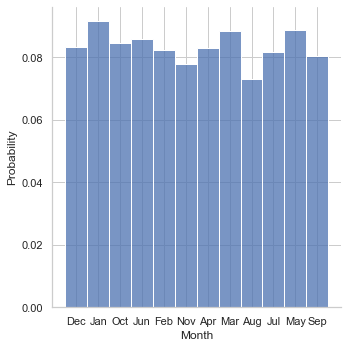

In [32]:
# PERCENTAGE BAR PLOT 
### Source Code-https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
sns.displot(x ='Month',stat="probability",data = vf)

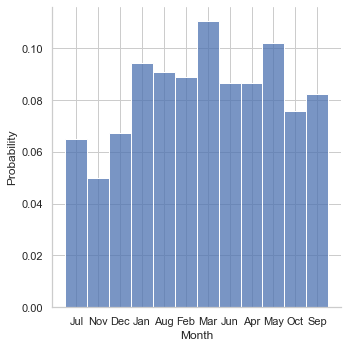

In [34]:
vf2=vf.loc[vf['FraudFound_P']==1]
sns.displot(x ='Month',stat="probability",data = vf2)

Month
Apr    0.062500
Aug    0.074534
Dec    0.048249
Feb    0.064771
Jan    0.061658
Jul    0.047733
Jun    0.060560
Mar    0.075000
May    0.068764
Nov    0.038301
Oct    0.053640
Sep    0.061290
Name: FraudFound_P, dtype: float64
Month
Apr    0.242156
Aug    0.262755
Dec    0.214375
Feb    0.246218
Jan    0.240619
Jul    0.213285
Jun    0.238612
Mar    0.263488
May    0.253145
Nov    0.192003
Oct    0.225392
Sep    0.239959
Name: FraudFound_P, dtype: float64


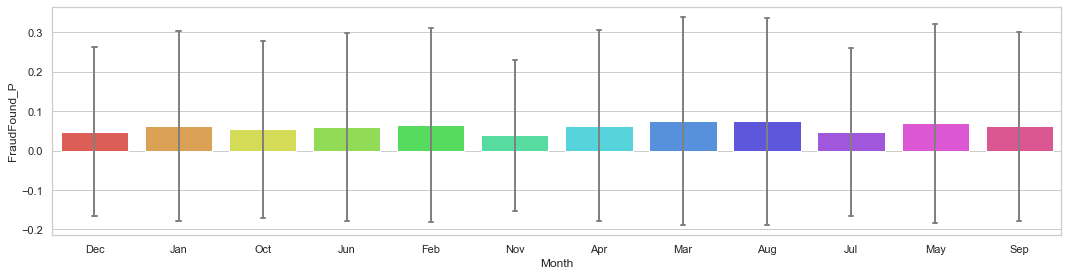

In [35]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Month', y = 'FraudFound_P', data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['Month']).mean()['FraudFound_P'])
print(vf.groupby(['Month']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

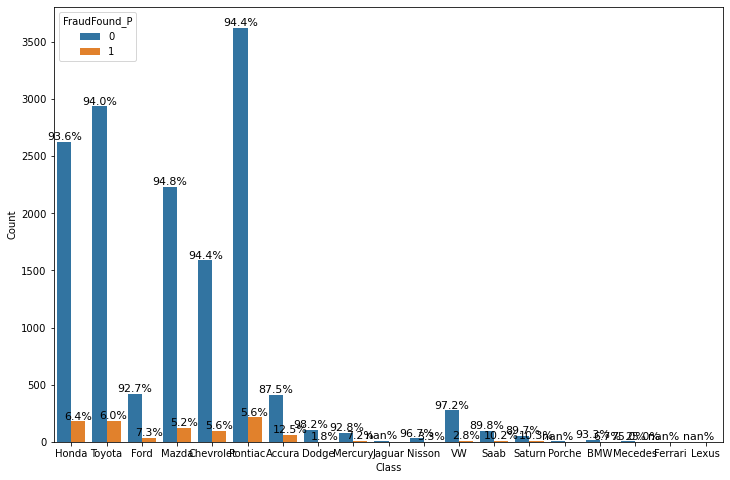

In [25]:
### https://stackoverflow.com/questions/69690399/how-to-add-percentages-on-countplot-in-seaborn
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

#df = sns.load_dataset("titanic")

plt.figure(figsize=(12, 8))
ax3 = sns.countplot(x="Make",hue="FraudFound_P" ,data=vf)
ax3.set(xlabel='Class', ylabel='Count')

percentage_above_bar_relative_to_xgroup(ax3)
plt.show()

Make
Accura       0.125000
BMW          0.066667
Chevrolet    0.055919
Dodge        0.018349
Ferrari      0.000000
Ford         0.073333
Honda        0.063906
Jaguar       0.000000
Lexus        0.000000
Mazda        0.052251
Mecedes      0.250000
Mercury      0.072289
Nisson       0.033333
Pontiac      0.055512
Porche       0.000000
Saab         0.101852
Saturn       0.103448
Toyota       0.059596
VW           0.028269
Name: FraudFound_P, dtype: float64
Make
Accura       0.331070
BMW          0.258199
Chevrolet    0.229834
Dodge        0.134829
Ferrari      0.000000
Ford         0.260973
Honda        0.244629
Jaguar       0.000000
Lexus             NaN
Mazda        0.222581
Mecedes      0.500000
Mercury      0.260540
Nisson       0.182574
Pontiac      0.229007
Porche       0.000000
Saab         0.303863
Saturn       0.307203
Toyota       0.236775
VW           0.166033
Name: FraudFound_P, dtype: float64


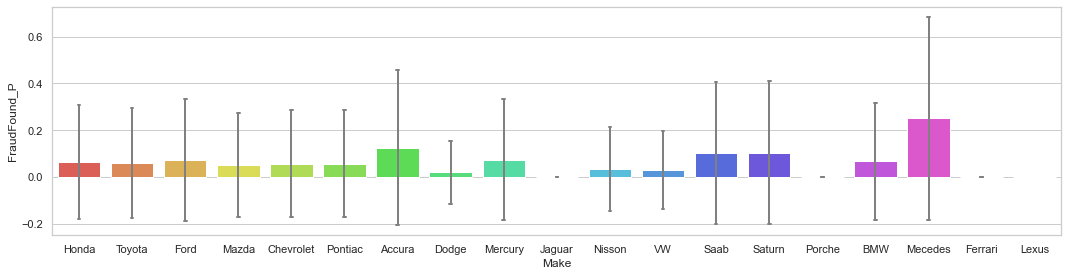

In [28]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Make', y = 'FraudFound_P', data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['Make']).mean()['FraudFound_P'])
print(vf.groupby(['Make']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

In [ ]:
vf['FraudFound_P'].value_counts()

<AxesSubplot:xlabel='FraudFound_P', ylabel='count'>

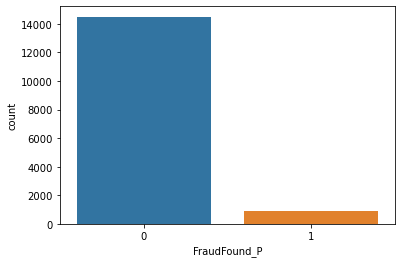

In [9]:
sns.countplot(x='FraudFound_P',data=vf)

[Text(0, 0.5, 'Percent')]

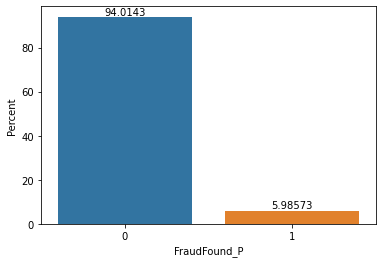

In [10]:
# PERCENTAGE BAR PLOT 
### Source Code-https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
ax = sns.barplot(x='FraudFound_P', y='FraudFound_P', data=vf, estimator=lambda x: len(x) / len(vf) * 100)
ax.bar_label(ax.containers[0])
ax.set(ylabel="Percent")

### Close to 94% (14497 claims) tranaction are fair and 6%(923 claims) are fraudulent. 

#### Checking the contribution of sex type on fruadulent and legitimate claims
#### Note= 0 is fair and 1 is fraudulent claims

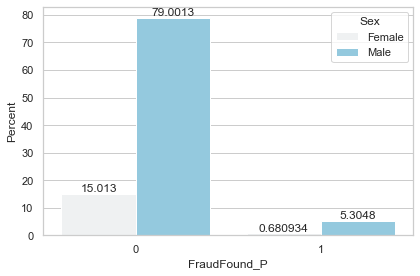

In [13]:
sns.set(style="whitegrid")
ax=sns.barplot(data=vf,x='FraudFound_P', y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()


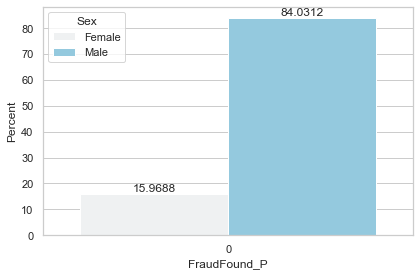

In [14]:
vf1=vf.loc[vf['FraudFound_P']==0]
sns.set(style="whitegrid")  
ax=sns.barplot(data=vf1,x='FraudFound_P',y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf1) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
    plt.tight_layout()
plt.show()

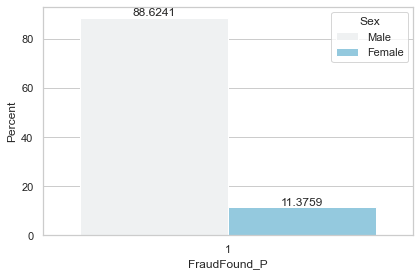

In [15]:
vf2=vf.loc[vf['FraudFound_P']==1]
sns.set(style="whitegrid") 
ax=sns.barplot(data=vf2,x='FraudFound_P',y='FraudFound_P',hue='Sex', color="skyblue",estimator=lambda x: len(x) / len(vf2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

#### "Amongst the total claims males contribute 84.03% for non-fraudulent transactions but contribute 88.62% of fraudulent transactions. Males are more likely to submit fraudulent claims")<b>

## Checking for relation between week of month and fraud probablistically

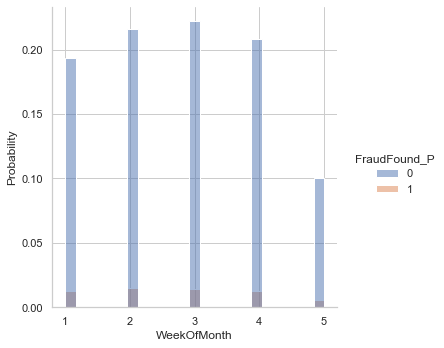

In [16]:
sns.displot(x ='WeekOfMonth', hue = "FraudFound_P",stat="probability",data = vf)
 
# Show the plot
plt.show()

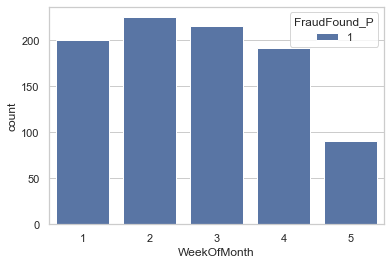

In [17]:
sns.countplot(x ='WeekOfMonth', hue = "FraudFound_P", data = vf2)
 
# Show the plot
plt.show()

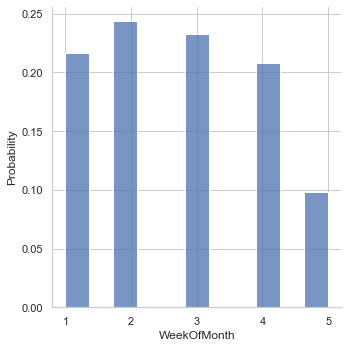

In [18]:
sns.displot(x ='WeekOfMonth',stat="probability",data = vf2)
 
# Show the plot
plt.show()

## Checking for fraudulent transactions by age column

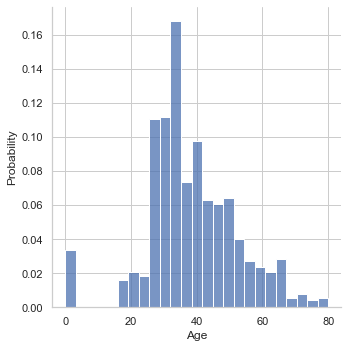

In [19]:
sns.displot(x ='Age',stat="probability",data = vf2)
 
# Show the plot
plt.show()

### There are several readings for age=0, which canot be driver .At this point we are not sure what that age column is. Interesting observation is the distribution of age groups and it seems like most case are clustered between age 20 and 60 with significant increase in fraudulent activities for age group 30 to40

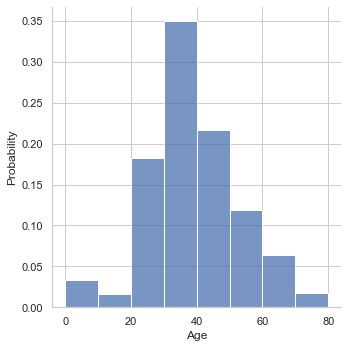

In [24]:
ax=sns.displot(x ='Age',stat="probability",bins=8,data = vf2)
# Show the plot
plt.show()

### Age group 30-40 is most probable (0.35) had more incidences of fraudulent transaction compared to other age groups

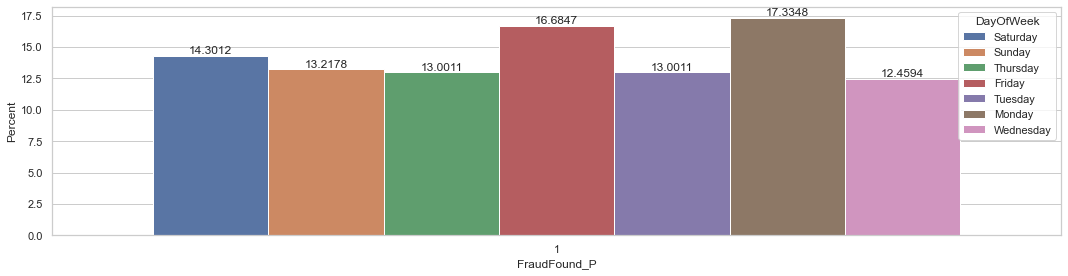

In [26]:

sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=vf2,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',
              estimator=lambda x: len(x) / len(vf2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()



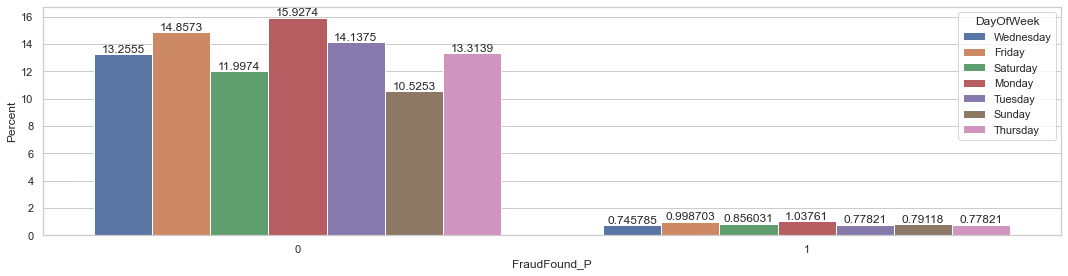

In [27]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=vf,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',estimator=lambda x: len(x) / len(vf) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()



 ####  % of fraudulent transacitons is higher on Monday and Friday. Similarly, the number of claims is also higher for Monday and Friday. Probably due to hurry to go to work on Monday or coming back Friday Evening. But we do not have any time data

## Examing the Vehicle category and impact of sex on fraudulent activites

Sex     VehicleCategory
Female  Sedan              0.066387
        Sport              0.010121
        Utility            0.000000
Male    Sedan              0.084951
        Sport              0.016934
        Utility            0.112821
Name: FraudFound_P, dtype: float64
Sex     VehicleCategory
Female  Sedan              0.249045
        Sport              0.100146
        Utility                 NaN
Male    Sedan              0.278826
        Sport              0.129038
        Utility            0.316780
Name: FraudFound_P, dtype: float64


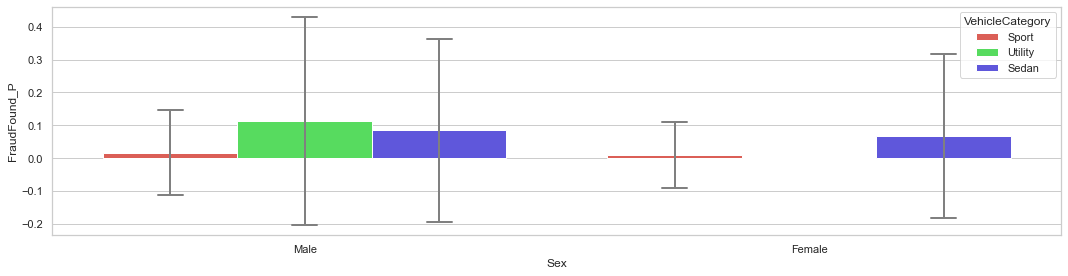

In [29]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P', hue = 'VehicleCategory', data = vf,
            palette = 'hls',
            order = ['Male', 'Female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['Sex', 'VehicleCategory']).mean()['FraudFound_P'])
print(vf.groupby(['Sex', 'VehicleCategory']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()


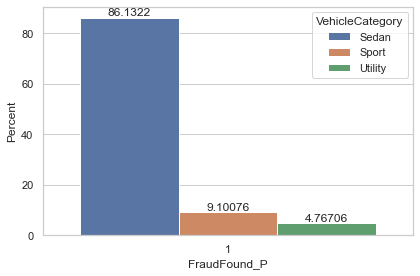

In [30]:
vf2=vf.loc[vf['FraudFound_P']==1]
sns.set(style="whitegrid") 
ax=sns.barplot(data=vf2,x='FraudFound_P',y='FraudFound_P',hue='VehicleCategory',estimator=lambda x: len(x) / len(vf2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

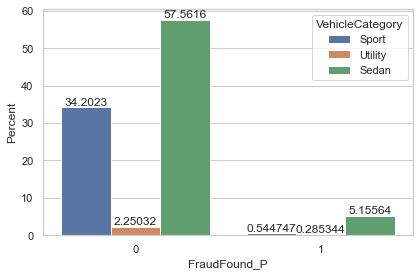

In [31]:
sns.set(style="whitegrid") 
ax=sns.barplot(data=vf,x='FraudFound_P',y='FraudFound_P',hue='VehicleCategory',estimator=lambda x: len(x) / len(vf) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

VehicleCategory
Sedan      0.082205
Sport      0.015677
Utility    0.112532
Name: FraudFound_P, dtype: float64
VehicleCategory
Sedan      0.274690
Sport      0.124236
Utility    0.316425
Name: FraudFound_P, dtype: float64


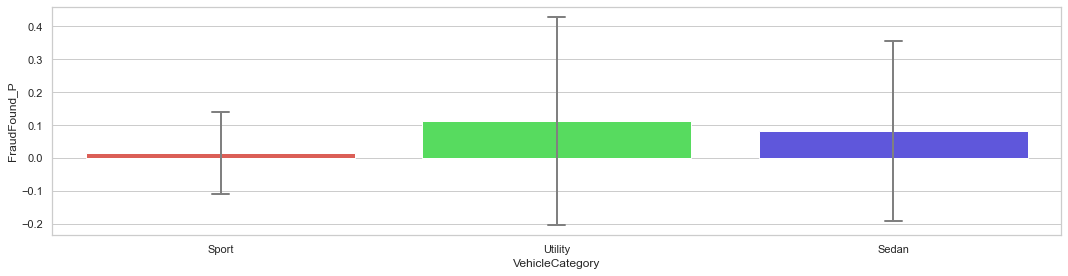

In [32]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'VehicleCategory', y = 'FraudFound_P',  data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['VehicleCategory']).mean()['FraudFound_P'])
print(vf.groupby(['VehicleCategory']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

Sex
Female    0.043388
Male      0.062923
Name: FraudFound_P, dtype: float64
Sex
Female    0.203772
Male      0.242834
Name: FraudFound_P, dtype: float64


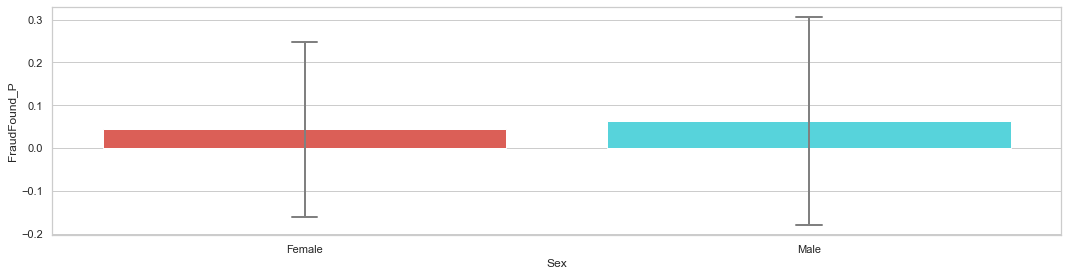

In [40]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P',  data = vf,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(vf.groupby(['Sex']).mean()['FraudFound_P'])
print(vf.groupby(['Sex']).std()['FraudFound_P'])
plt.tight_layout()
plt.show()

### Few interesting observations:
1.Males driving Utility vehicles have higher probablity of fraud, but it may be due to the fact that most utility vehicles are driven by males

2. Overall, Utility vehicles have higher probablity of fraudulent transactions disproportionately.

3.Sedans have some what similar probablity of frauds for males and females
4. Males on average 

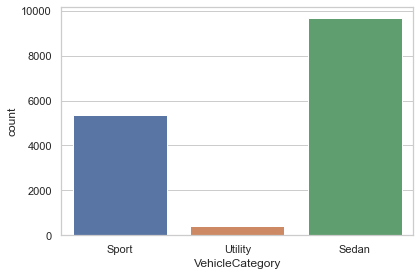

In [39]:
# PERCENTAGE BAR PLOT 
### Source Code-https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
ax = sns.countplot(x='VehicleCategory', data=vf)
plt.tight_layout()
plt.show()

####  One thing which stands out is , that sports vehicles are less likely to be involved in fraud. Most of the claims are coming from sedans. But they are driven the most also. Utility Vehicle involved in claims have 0.11% probable on an average to have fraudulent claims where as sports vehicles are only 0.02% likely to be involved in false claims
VehicleCategory

Sedan      0.082205

Sport      0.015677

Utility    0.112532

<AxesSubplot:xlabel='FraudFound_P', ylabel='VehicleCategory'>

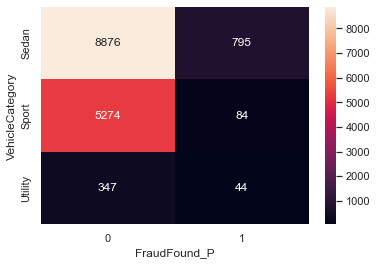

In [41]:
# Group the dataset by Pclass and Survived and then unstack them
group = vf.groupby(['VehicleCategory', 'FraudFound_P'])
vfvcfp = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(vfvcfp, annot = True, fmt ="d")

# Above correlation matix also indicates utility vehicles have higher expectation of being involved in fraudulent activities